<a href="https://colab.research.google.com/github/Chinhan1532/AI_Homework/blob/main/nhandiendoan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [ ]:
data = "/content/drive/MyDrive/Food"

In [ ]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory(data, target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices

Found 200 images belonging to 10 classes.


{'banhbao': 0,
 'banhbeo': 1,
 'banhcuon': 2,
 'banhhoi': 3,
 'banhmi': 4,
 'banhtrangcuon': 5,
 'banhxeo': 6,
 'bundau': 7,
 'comtam': 8,
 'pho': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [ ]:
from keras.losses import categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train=model.fit(Train,batch_size=128,epochs=20,verbose=1)
test=model.evaluate(Train,verbose=0)
print('Do mat mat:',test[0])
print('Do chinh xac:',test[1])

Epoch 1/20
7/7 [==============================] - 43s 6s/step - loss: 9.5792 - accuracy: 0.1150
Epoch 2/20
7/7 [==============================] - 13s 2s/step - loss: 2.3101 - accuracy: 0.1200
Epoch 3/20
7/7 [==============================] - 14s 2s/step - loss: 2.2140 - accuracy: 0.2450
Epoch 4/20
7/7 [==============================] - 13s 2s/step - loss: 2.0445 - accuracy: 0.2350
Epoch 5/20
7/7 [==============================] - 14s 2s/step - loss: 1.7227 - accuracy: 0.4650
Epoch 6/20
7/7 [==============================] - 13s 2s/step - loss: 1.5969 - accuracy: 0.4650
Epoch 7/20
7/7 [==============================] - 13s 2s/step - loss: 1.4631 - accuracy: 0.5500
Epoch 8/20
7/7 [==============================] - 13s 2s/step - loss: 1.1970 - accuracy: 0.5700
Epoch 9/20
7/7 [==============================] - 14s 2s/step - loss: 0.9654 - accuracy: 0.6950
Epoch 10/20
7/7 [==============================] - 13s 2s/step - loss: 0.9597 - accuracy: 0.6500
Epoch 11/20
7/7 [======================

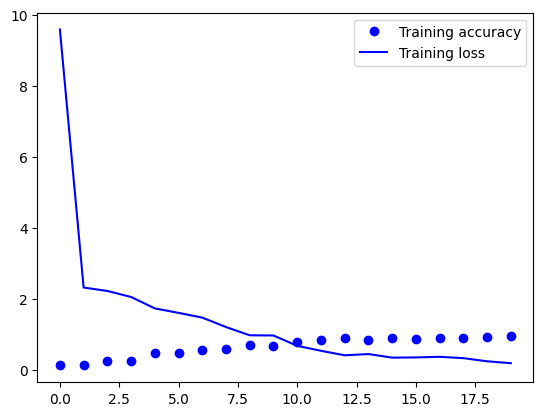

In [ ]:
accuracy= train.history['accuracy']
loss = train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/BT/nhandiendoan.h5')

In [ ]:
model_1 = load_model('/content/drive/MyDrive/Colab Notebooks/BT/nhandiendoan.h5')

1/1 [==============================] - 0s 98ms/step
 Món này là : Bánh xèo


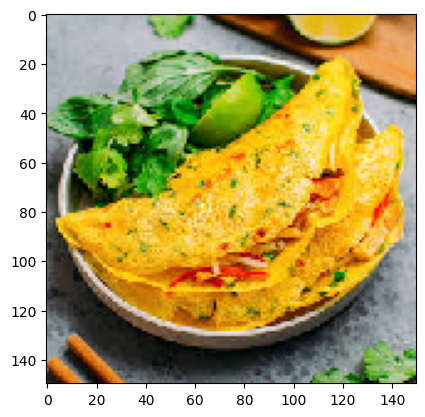

1/1 [==============================] - 0s 109ms/step
 Món này là : Bánh bèo


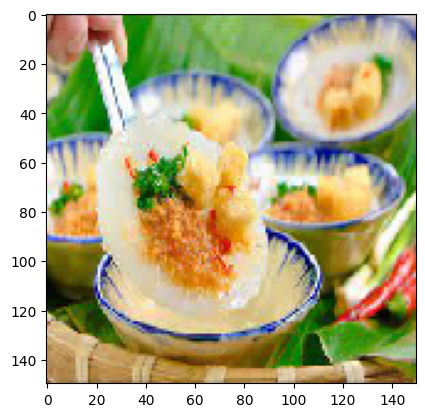

1/1 [==============================] - 0s 59ms/step
 Món này là : Bánh cuốn


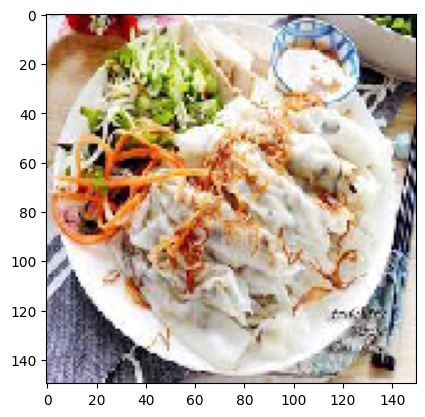

1/1 [==============================] - 0s 356ms/step
 Món này là : Bánh hỏi


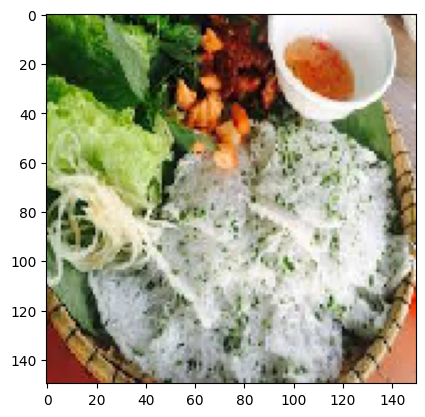

1/1 [==============================] - 0s 215ms/step
 Món này là : Bánh tráng cuốn


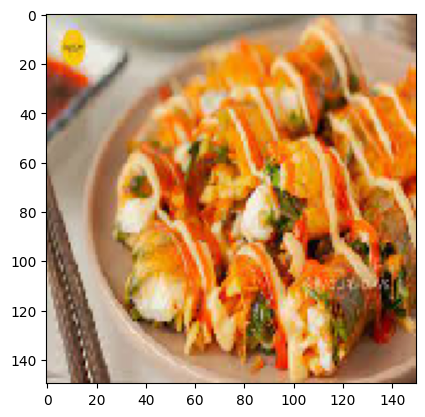

1/1 [==============================] - 0s 63ms/step
 Món này là : Phở


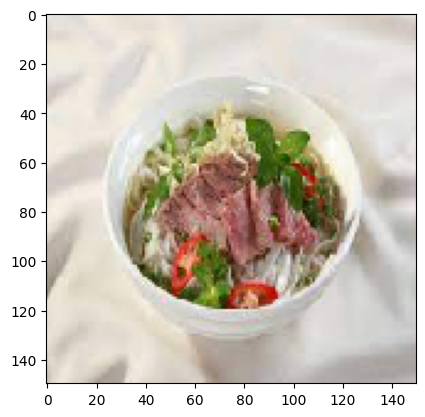

1/1 [==============================] - 0s 41ms/step
 Món này là : Bún đậu


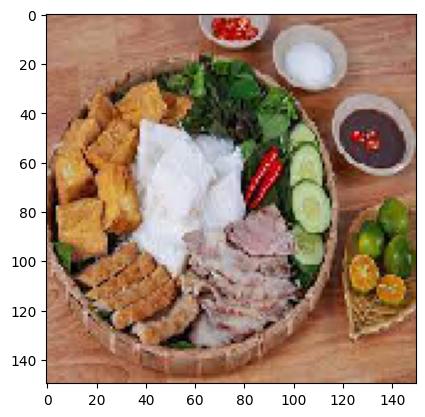

1/1 [==============================] - 0s 52ms/step
 Món này là : Cơm tấm


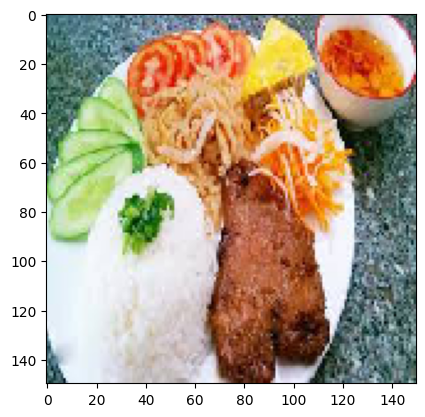

1/1 [==============================] - 0s 48ms/step
 Món này là : Bánh bao


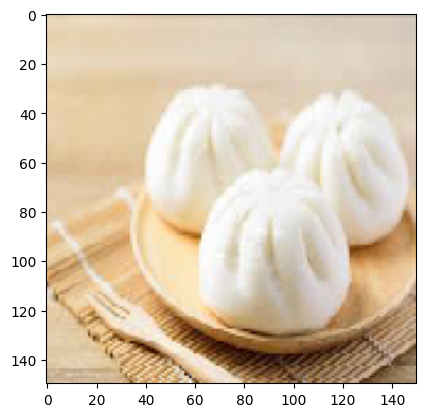

1/1 [==============================] - 0s 48ms/step
 Món này là : Bánh mì


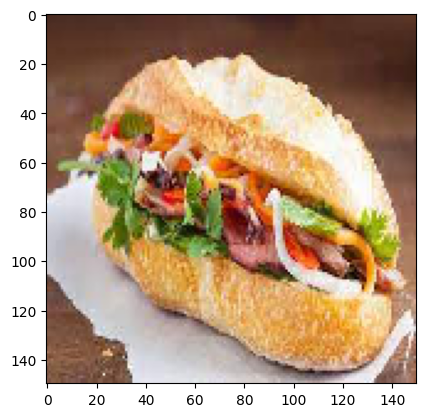

In [ ]:
folder='/content/drive/MyDrive/testfood/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Bánh bao', 'Bánh bèo', 'Bánh cuốn', 'Bánh hỏi', 'Bánh mì','Bánh tráng cuốn','Bánh xèo','Bún đậu','Cơm tấm','Phở']
  print(' Món này là : {}'.format(class_name[result]))
  plt.show()